In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.__version__

'1.22.4'

In [3]:
N = 500

x1 = np.random.normal(0, 1, N)
y1 = np.random.normal(0, 1, N)

x2 = np.random.normal(4, 1, N)
y2 = np.random.normal(4, 1, N)

x3 = np.random.normal(8, 1, N)
y3 = np.random.normal(8, 1, N)

x = np.concatenate((x1, x2, x3))
y = np.concatenate((y1, y2, y3))

x.shape, y.shape

arr = np.concatenate((x[:, np.newaxis], y[:, np.newaxis]), axis=1)
arr.shape

(1500, 2)

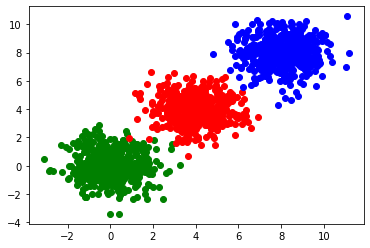

In [4]:
plt.scatter(x1,y1, c='g')
plt.scatter(x2,y2, c='r')
plt.scatter(x3,y3, c='b')

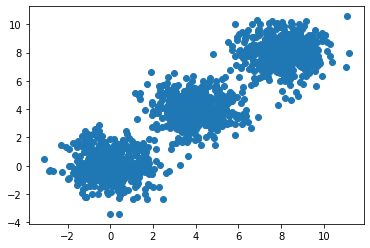

In [5]:
plt.scatter(arr[:,0], arr[:,1])

In [6]:
class KMeans:
    
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        
    def fit(self, X):
        self.X = X
        centroids = self.init_centroids()
        pre_labels = np.zeros(len(X)).astype(int)
        curr_labels = self.compute_labels(centroids)
        centroids = self.compute_centroids(curr_labels)
        
        while not np.array_equal(pre_labels, curr_labels):
            pre_labels = curr_labels
            curr_labels = self.compute_labels(centroids)
            centroids = self.compute_centroids(curr_labels)
            print(self.compute_inertia(curr_labels, centroids))

        return curr_labels

    def init_centroids(self):
        seed = np.random.permutation(len(self.X))[:self.n_clusters]
        return self.X[seed]

    def compute_labels(self, centroids):
        labels = np.argmin(np.sum((self.X[:, np.newaxis, :] - centroids[np.newaxis, :, :])**2, axis=-1), axis=-1)
        return labels

    def compute_centroids(self, labels):
        centroids = np.asarray([np.mean(self.X[labels==c_idx], axis=0) for c_idx in range(self.n_clusters)])
        return centroids

    def compute_inertia(self, labels, centroids):
        inertia = np.mean(np.sum((self.X - centroids[labels])**2, axis=-1))
        return inertia

In [7]:
kmeans = KMeans(3)

In [8]:
np.random.shuffle(arr)
labels = kmeans.fit(arr)

2.028749224039423
2.028749224039423


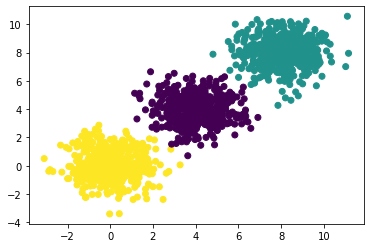

In [9]:
plt.scatter(arr[:,0], arr[:,1], c=labels)